install ipympl

`conda install -c conda-forge ipympl`

and restart jupyter notebook

In [1]:
%matplotlib widget
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [28]:


with open('../data/obj/Psyche Hanuš.obj', 'r') as f:
    file = f.read()
    file = file.splitlines()
       

In [29]:
vfs = []
for q in file:
    if not '#' in q:
        vfs.append(q)
        
verts = []
faces = []

for i in range(vfs.count('')):
    vfs.remove('')

for i in range(len(vfs)):
    vfs[i] = vfs[i].split(' ')
    
    for j in range(vfs[i].count('')):
        vfs[i].remove('')
    if vfs[i][0] == 'v':
        verts.append(vfs[i][1:])
    
    elif vfs[i][0] == 'f':
        faces.append(vfs[i][1:])
    

In [30]:
vfs

[['v', '0.264157', '5.740792', '82.350360'],
 ['v', '20.691957', '5.740792', '82.347460'],
 ['v', '0.264157', '26.494492', '76.532560'],
 ['v', '-20.228443', '5.740792', '80.029260'],
 ['v', '0.264157', '-14.626408', '84.261860'],
 ['v', '39.637957', '5.740792', '78.776460'],
 ['v', '27.726857', '32.151992', '73.518360'],
 ['v', '0.264157', '45.570692', '70.181260'],
 ['v', '-28.025143', '35.627692', '71.154460'],
 ['v', '-39.316043', '5.740792', '76.386360'],
 ['v', '-27.454243', '-20.771708', '78.260960'],
 ['v', '0.264157', '-33.694908', '79.944860'],
 ['v', '29.056657', '-23.115208', '83.883260'],
 ['v', '56.666857', '5.740792', '72.141560'],
 ['v', '47.616857', '31.715392', '67.997460'],
 ['v', '27.913457', '50.626392', '66.751460'],
 ['v', '0.264157', '60.718592', '64.896760'],
 ['v', '-28.190443', '56.089592', '64.908760'],
 ['v', '-48.626643', '35.815292', '67.435060'],
 ['v', '-56.183243', '5.740792', '72.833660'],
 ['v', '-48.282543', '-20.380808', '72.339460'],
 ['v', '-27.7

In [5]:
verts = np.array(verts, dtype= float)
faces = np.array(faces, dtype= float)
verts

array([[  0.264157,   5.740792,  82.35036 ],
       [ 20.691957,   5.740792,  82.34746 ],
       [  0.264157,  26.494492,  76.53256 ],
       ...,
       [-19.573043,   5.740792, -75.66074 ],
       [  0.264157, -13.268708, -71.05814 ],
       [  0.264157,   5.740792, -77.34204 ]])

In [6]:
df_f = pd.DataFrame(faces, columns= ['x','y','z'])
df_f

,x,y,z
0,1.0,2.0,3.0
1,1.0,3.0,4.0
2,1.0,4.0,5.0
3,1.0,5.0,2.0
4,2.0,6.0,7.0
...,...,...,...
795,398.0,390.0,397.0
796,402.0,399.0,398.0
797,402.0,400.0,399.0
798,402.0,401.0,400.0


In [7]:
df_v = pd.DataFrame(verts, columns= ['x','y','z'])
df_v

,x,y,z
0,0.264157,5.740792,82.35036
1,20.691957,5.740792,82.34746
2,0.264157,26.494492,76.53256
3,-20.228443,5.740792,80.02926
4,0.264157,-14.626408,84.26186
...,...,...,...
397,20.154757,5.740792,-76.29494
398,0.264157,27.546892,-83.11054
399,-19.573043,5.740792,-75.66074
400,0.264157,-13.268708,-71.05814


In [8]:
df_v= (df_v-(df_v.max(0)+df_v.min(0))/2)/max(df_v.max(0)-df_v.min(0))
df_v

,x,y,z
0,0.010900,0.091927,0.310197
1,0.084555,0.091927,0.310186
2,0.010900,0.166758,0.289220
3,-0.062990,0.091927,0.301828
4,0.010900,0.018490,0.317089
...,...,...,...
397,0.082618,0.091927,-0.261823
398,0.010900,0.170552,-0.286398
399,-0.060627,0.091927,-0.259536
400,0.010900,0.023385,-0.242941


interactive 3D plots are laggy so they're just raw text cells until you want to run them (make them code cells and run the cell)

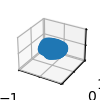

In [9]:
fig = plt.figure(figsize= (1,1))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(df_v['x'], df_v['y'], df_v['z'])
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
plt.show()

ValueError: Argument Z must be 2-dimensional.

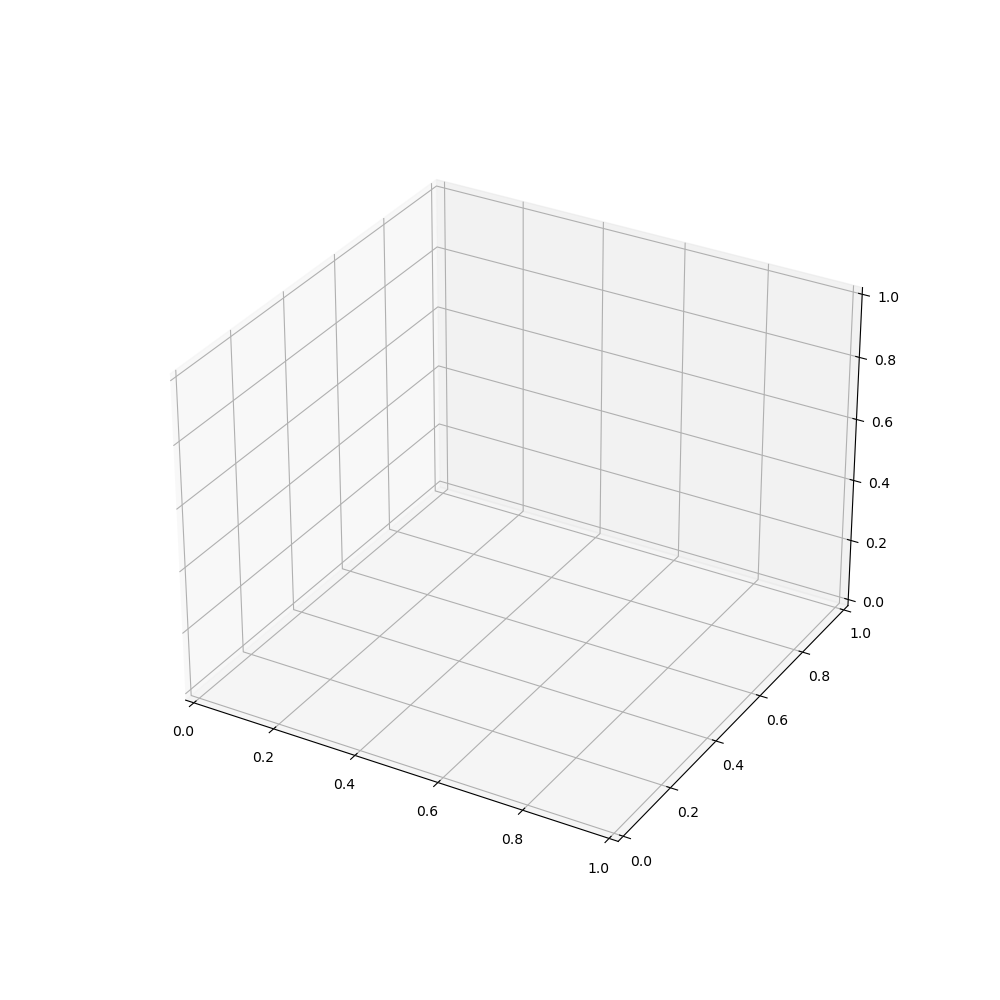

In [10]:
fig = plt.figure(figsize= (10,10))
ax = fig.add_subplot(projection= '3d')


ax.plot_surface(df_v['x'][:], df_v['y'][:], df_v['z'][:])
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

plt.show()

[whatever this is](https://matplotlib.org/matplotblog/posts/custom-3d-engine/)

i litteraly have no idea how this works

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

def frustum(left, right, bottom, top, znear, zfar):
    M = np.zeros((4, 4), dtype=np.float32)
    M[0, 0] = +2.0 * znear / (right - left)
    M[1, 1] = +2.0 * znear / (top - bottom)
    M[2, 2] = -(zfar + znear) / (zfar - znear)
    M[0, 2] = (right + left) / (right - left)
    M[2, 1] = (top + bottom) / (top - bottom)
    M[2, 3] = -2.0 * znear * zfar / (zfar - znear)
    M[3, 2] = -1.0
    return M
def perspective(fovy, aspect, znear, zfar):
    h = np.tan(0.5*np.radians(fovy)) * znear
    w = h * aspect
    return frustum(-w, w, -h, h, znear, zfar)
def translate(x, y, z):
    return np.array([[1, 0, 0, x], [0, 1, 0, y],
                     [0, 0, 1, z], [0, 0, 0, 1]], dtype=float)
def xrotate(theta):
    t = np.pi * theta / 180
    c, s = np.cos(t), np.sin(t)
    return np.array([[1, 0,  0, 0], [0, c, -s, 0],
                     [0, s,  c, 0], [0, 0,  0, 1]], dtype=float)
def yrotate(theta):
    t = np.pi * theta / 180
    c, s = np.cos(t), np.sin(t)
    return  np.array([[ c, 0, s, 0], [ 0, 1, 0, 0],
                      [-s, 0, c, 0], [ 0, 0, 0, 1]], dtype=float)
V, F = [], []
with open("../data/obj/Eros Gaskell 50k poly.obj") as f:
    for line in f.readlines():
        if line.startswith('#'):  continue
        values = line.split()
        if not values:            continue
        if values[0] == 'v':      V.append([float(x) for x in values[1:4]])
        elif values[0] == 'f' :   F.append([int(x) for x in values[1:4]])
V, F = np.array(V), np.array(F)-1
V = (V-(V.max(0)+V.min(0))/2) / max(V.max(0)-V.min(0))
MVP = perspective(25,1,1,100) @ translate(0,0,-3.5) @ xrotate(20) @ yrotate(45)
V = np.c_[V, np.ones(len(V))]  @ MVP.T
V /= V[:,3].reshape(-1,1)
V = V[F]
T =  V[:,:,:2]
Z = -V[:,:,2].mean(axis=1)
zmin, zmax = Z.min(), Z.max()
Z = (Z-zmin)/(zmax-zmin)
C = plt.get_cmap("magma")(Z)
I = np.argsort(Z)
T, C = T[I,:], C[I,:]
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1], xlim=[-1,+1], ylim=[-1,+1], aspect=1, frameon=False)
collection = PolyCollection(T, closed=True, linewidth=0.1, facecolor=C, edgecolor="black")
ax.add_collection(collection)
plt.show()